### Strategic-Sales-Forecasting-Full-Spectrum-Sales---Demand-Forecasting

### About Dataset
### Description:
This dataset offers a granular, item-level view of daily sales from a diverse group of 50 restaurants, spanning a full year from January 2024 to January 2025. It serves as a comprehensive resource for time-series analysis, demand forecasting, and investigating the various factors that influence customer purchasing habits across different restaurant types, including Cafes, Casual Dining, Fine Dining, Food Stalls, and Kopitiams.

Each row represents the total quantity sold of a specific menu item at a single restaurant on a given day. The dataset is enriched with valuable contextual information, such as weather conditions, promotions, and special events. It also includes detailed financial metrics for each menu item, including the typical ingredient cost, the observed market price, and the actual selling price, making it ideal for analyzing pricing strategies and promotional effectiveness.

### Potential Uses:
This versatile dataset is well-suited for a variety of analytical projects:

1.Sales Forecasting: Develop time-series models (e.g., ARIMA, Prophet) to predict daily sales volumes for specific menu items, individual restaurants, or different restaurant types.

2.Demand Analysis: Analyze how external factors like weather conditions and special events impact sales across various item categories and restaurant types.

3.Promotion Effectiveness: Evaluate the impact of promotions by comparing the quantity sold and profitability on days with and without promotional activities.

4.Menu Engineering: Identify the most and least popular menu items to make data-driven decisions regarding menu optimization, inventory management, and marketing focus. By analyzing item popularity against profitability, restaurants can strategically design their menus to maximize revenue.

5.Customer Behavior Insights: Uncover patterns in sales data to understand customer preferences. For instance, determine if certain meal types are more popular on weekends versus weekdays or how pricing impacts choice across different dining segments.

6.Comparative Analysis: Compare sales performance, pricing strategies, and menu popularity across different restaurants and restaurant types (e.g., Casual Dining vs. Fine Dining) to identify key drivers of success.

### 1. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/alexandchen/restaurant-sales-report-2024-2025/data

### 1.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('dataset/restaurant_sales_data.csv')

#### Show Top 5 Records

In [4]:
df.head()

,date,restaurant_id,restaurant_type,menu_item_name,meal_type,key_ingredients_tags,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold,has_promotion,special_event,weather_condition
0,1/1/2024,11,Food Stall,Laksa,Lunch,"rice noodles, fish broth, tamarind, shrimp pas...",4.5,10.59,12.48,361,False,False,Sunny
1,1/1/2024,7,Casual Dining,Spaghetti Carbonara,Dinner,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,26.64,60.46,105,False,False,Sunny
2,1/1/2024,23,Fine Dining,Beef Rendang,Dinner,"beef, coconut milk, galangal, lemongrass, spic...",9.0,49.42,80.15,36,False,False,Rainy
3,1/1/2024,22,Food Stall,Roti Canai,Dinner,"flour, ghee, egg, water, curry",0.8,2.04,2.48,503,False,False,Sunny
4,1/1/2024,32,Fine Dining,Spaghetti Carbonara,Lunch,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,40.30,55.54,262,False,False,Rainy


#### Shape of the dataset

In [5]:
df.shape

(10000, 13)

### 1.2 Dataset information

Date : The calendar date of the sales record → (e.g., “2024-03-01”)

RestaurantID : Identifier for the restaurant location or branch → (e.g., “R001”, “R050”)

ItemName : The name of the menu item sold → (e.g., “Cheeseburger”, “Caesar Salad”)

Category : The category of the menu item (e.g., “Entree”, “Appetiser”, “Beverage”)

UnitsSold : Number of units of that item sold on that date → (e.g., 15, 120)

UnitPrice : The selling price per unit of that item → (e.g., 9.99, 4.50)

TotalSales : The total revenue for that item on that date (UnitsSold × UnitPrice) → (e.g., 149.85)

Cost : The cost value associated with that item (e.g., ingredient cost or cost to restaurant)

GrossProfit : Sales minus Cost → (e.g., 149.85 – 80.00 = 69.85)

DayOfWeek : The day of week (e.g., Monday, Tuesday) which can help with trend analysis

PromotionFlag : A flag indicating if a promotion/discount was applied → (e.g., Yes/No)

Shift : May indicate which shift (e.g., Lunch, Dinner) the sale belongs to

GuestsCount : Number of guests/customers on that date in that location

AvgSpendPerGuest : Average spend per guest (TotalSales ÷ GuestsCount)

Location : Possibly a region/area or city where the restaurant is situated

### 2. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 2.1 Check Missing values

In [6]:
df.isnull().sum()

date                       0
restaurant_id              0
restaurant_type            0
menu_item_name             0
meal_type                  0
key_ingredients_tags       0
typical_ingredient_cost    0
observed_market_price      0
actual_selling_price       0
quantity_sold              0
has_promotion              0
special_event              0
weather_condition          0
dtype: int64

#### There are no missing values in the data set

### 2.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 2.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10000 non-null  object 
 1   restaurant_id            10000 non-null  int64  
 2   restaurant_type          10000 non-null  object 
 3   menu_item_name           10000 non-null  object 
 4   meal_type                10000 non-null  object 
 5   key_ingredients_tags     10000 non-null  object 
 6   typical_ingredient_cost  10000 non-null  float64
 7   observed_market_price    10000 non-null  float64
 8   actual_selling_price     10000 non-null  float64
 9   quantity_sold            10000 non-null  int64  
 10  has_promotion            10000 non-null  bool   
 11  special_event            10000 non-null  bool   
 12  weather_condition        10000 non-null  object 
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 879.0+ KB


### 2.4 Checking the number of unique values of each column

In [9]:
df.nunique()

date                        367
restaurant_id                50
restaurant_type               5
menu_item_name               14
meal_type                     3
key_ingredients_tags         14
typical_ingredient_cost      13
observed_market_price      3104
actual_selling_price       4069
quantity_sold               965
has_promotion                 2
special_event                 2
weather_condition             3
dtype: int64

### 2.5 Check statistics of data set

In [10]:
df.describe()

,restaurant_id,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,25.409300,3.903450,12.646275,18.85899,286.00040
std,14.449306,2.874441,11.857813,18.18718,217.28445
min,1.000000,0.800000,1.460000,1.36000,0.00000
25%,13.000000,1.200000,4.487500,6.11000,128.00000
50%,25.000000,2.800000,8.230000,11.31000,245.00000
75%,38.000000,7.000000,16.350000,26.43250,392.25000
max,50.000000,9.000000,56.290000,83.09000,1668.00000


#### Insights:
From the above description of numerical data, the mean ingredient cost, market price, and selling price show a clear price progression — from 3.90 (cost) to 12.65 (market) to 18.86 (actual), indicating a strong markup trend.

The standard deviations of all price-related columns (around 2.8–18.1) suggest noticeable variation in pricing strategies and product categories among restaurants.

The minimum selling price (1.36) is slightly below the minimum market price (1.46), implying some restaurants sell below market during discounts or promotions.

The maximum selling price (83.09) and maximum market price (56.29) show a wide range of high-value premium items.

Quantity sold varies greatly (mean = 286, std = 217), showing large differences in item popularity; some items sold as few as 0 units, while others sold up to 1668 units.

Overall, the statistics indicate high variability across items and restaurants, strong profit margins, and diverse pricing and sales performance within the dataset.

### 2.6 Exploring Data

In [11]:
df.head()

,date,restaurant_id,restaurant_type,menu_item_name,meal_type,key_ingredients_tags,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold,has_promotion,special_event,weather_condition
0,1/1/2024,11,Food Stall,Laksa,Lunch,"rice noodles, fish broth, tamarind, shrimp pas...",4.5,10.59,12.48,361,False,False,Sunny
1,1/1/2024,7,Casual Dining,Spaghetti Carbonara,Dinner,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,26.64,60.46,105,False,False,Sunny
2,1/1/2024,23,Fine Dining,Beef Rendang,Dinner,"beef, coconut milk, galangal, lemongrass, spic...",9.0,49.42,80.15,36,False,False,Rainy
3,1/1/2024,22,Food Stall,Roti Canai,Dinner,"flour, ghee, egg, water, curry",0.8,2.04,2.48,503,False,False,Sunny
4,1/1/2024,32,Fine Dining,Spaghetti Carbonara,Lunch,"spaghetti, eggs, cheese, beef bacon, black pepper",9.0,40.30,55.54,262,False,False,Rainy


In [12]:
categorical_columns = ['restaurant_type', 'meal_type','menu_item_name', 'has_promotion','special_event','weather_condition']

for col in categorical_columns:
    print(f"Categories in '{col}' variable: ", end=" ")
    print(df[col].unique())


Categories in 'restaurant_type' variable:  ['Food Stall' 'Casual Dining' 'Fine Dining' 'Cafe' 'Kopitiam']
Categories in 'meal_type' variable:  ['Lunch' 'Dinner' 'Breakfast']
Categories in 'menu_item_name' variable:  ['Laksa' 'Spaghetti Carbonara' 'Beef Rendang' 'Roti Canai' 'Cendol'
 'Char Kway Teow' 'Tandoori Chicken' 'Kaya Toast Set' 'Chicken Chop'
 'Chicken Rice' 'Teh Tarik' 'Iced Lemon Tea' 'Nasi Lemak' 'Mushroom Soup']
Categories in 'has_promotion' variable:  [False  True]
Categories in 'special_event' variable:  [False  True]
Categories in 'weather_condition' variable:  ['Sunny' 'Rainy' 'Cloudy']


In [13]:
#checking unique values in 'key_ingredients_tags' column
print("Categories in 'key_ingredients_tags' variable: ", end=" ")
print(df['key_ingredients_tags'].unique())

Categories in 'key_ingredients_tags' variable:  ['rice noodles, fish broth, tamarind, shrimp paste, cucumber, mint'
 'spaghetti, eggs, cheese, beef bacon, black pepper'
 'beef, coconut milk, galangal, lemongrass, spices, chili'
 'flour, ghee, egg, water, curry'
 'rice flour jelly, coconut milk, palm sugar, red beans'
 'flat rice noodles, prawns, cockles, bean sprouts, chives, soy sauce'
 'chicken, yogurt, tandoori masala, ginger, garlic'
 'white bread, kaya, butter, soft-boiled eggs'
 'chicken thigh, black pepper sauce, fries, coleslaw'
 'chicken, rice, ginger, garlic, chili sauce, cucumber'
 'black tea, condensed milk, evaporated milk'
 'black tea, lemon, sugar syrup'
 'rice, coconut milk, sambal, anchovies, egg, peanuts'
 'mushrooms, cream, onion, garlic, vegetable broth']


### Numerical columns
'typical_ingredient_cost', 'observed_market_price', 'actual_selling_price', 'quantity_sold', 'profit_margin'

### Categorical columns
'restaurant_id','restaurant_type', 'meal_type','menu_item_name', 'has_promotion','special_event','weather_condition', 'key_ingredients_tags'

### Date

### Calculate Profit Column

In [14]:
df['profit'] = (df['actual_selling_price'] - df['typical_ingredient_cost']) * df['quantity_sold']

In [15]:
df.head(1)

,date,restaurant_id,restaurant_type,menu_item_name,meal_type,key_ingredients_tags,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold,has_promotion,special_event,weather_condition,profit
0,1/1/2024,11,Food Stall,Laksa,Lunch,"rice noodles, fish broth, tamarind, shrimp pas...",4.5,10.59,12.48,361,False,False,Sunny,2880.78


### Date Feature Extraction

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['week_day_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [17]:
df.head(1)

,date,restaurant_id,restaurant_type,menu_item_name,meal_type,key_ingredients_tags,typical_ingredient_cost,observed_market_price,actual_selling_price,quantity_sold,has_promotion,special_event,weather_condition,profit,day_of_week,month,week_day_weekend
0,2024-01-01,11,Food Stall,Laksa,Lunch,"rice noodles, fish broth, tamarind, shrimp pas...",4.5,10.59,12.48,361,False,False,Sunny,2880.78,Monday,January,Weekday


###  Bivariate and Multivariate Analysis (Demand Analysis Focus)

In [ ]:
## Promotion Effectiveness
df.groupby('has_promotion')[['quantity_sold', 'profit']].mean().reset_index()

,has_promotion,quantity_sold,profit
0,False,251.433545,2417.967815
1,True,482.186916,2888.598491


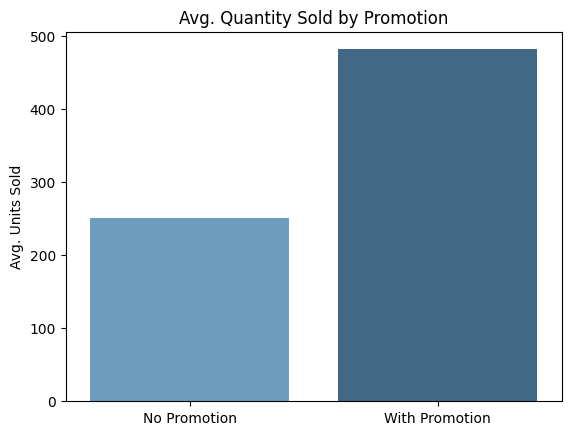

In [24]:
# Promotion - Quantity Sold Comparison
sns.barplot(x=['No Promotion', 'With Promotion'], y=[251.43, 482.19], palette='Blues_d')
plt.title('Avg. Quantity Sold by Promotion')
plt.ylabel('Avg. Units Sold')
plt.show()

In [ ]:
## Promotion Effectiveness
df.groupby('has_promotion')[['quantity_sold', 'profit']].mean().reset_index()

,special_event,quantity_sold,profit
0,False,281.886969,2445.068717
1,True,363.019724,3301.076075


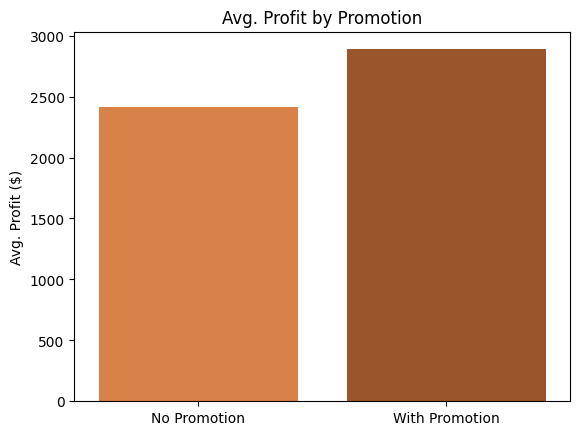

In [25]:
# Promotion - Profit Comparison
sns.barplot(x=['No Promotion', 'With Promotion'], y=[2417.97, 2888.60], palette='Oranges_d')
plt.title('Avg. Profit by Promotion')
plt.ylabel('Avg. Profit ($)')
plt.show()

#### Insight 
The analysis of Promotion Effectiveness and Special Event Impact shows that both strategies are financially beneficial, but serve different primary goals:

The current Promotional Strategy is highly effective, successfully driving Average Quantity Sold to nearly double the volume of non-promotional days ($\sim 482$ units vs. $\sim 251$ units), and resulting in a strong Average Profit ($\sim \$2,889$). However, Special Events prove to be the ultimate profit maximizer; despite causing only a moderate boost to sales volume ($\sim 363$ units), they generate the highest Average Profit of all factors analyzed ($\sim \$3,301$), indicating that these external events attract high-value, full-price transactions.

#### Impact of Weather Conditions on Demand

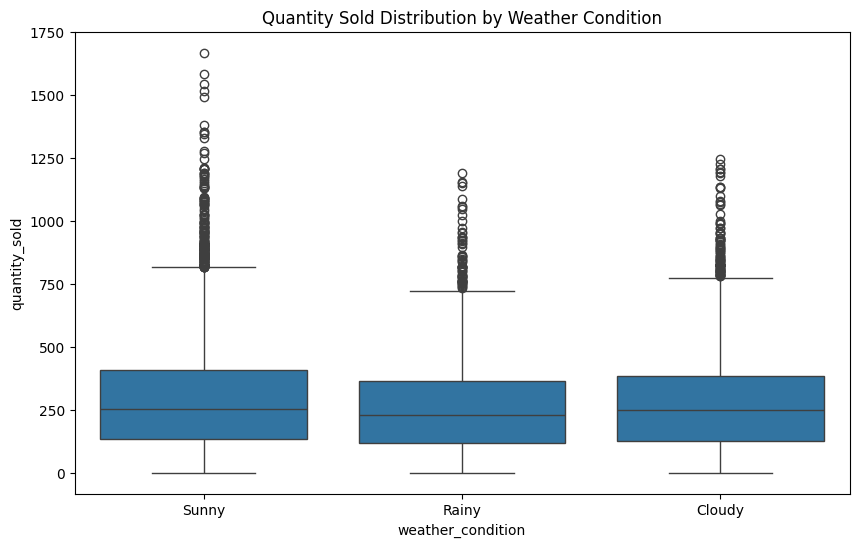

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_condition', y='quantity_sold', data=df)
plt.title('Quantity Sold Distribution by Weather Condition')
plt.show()

#### Insight
While the highest single-day sales volume occurred during sunny weather, no strong evidence of a major weather-related demand shift is apparent when looking at the entire sales distribution. Sales volumes on rainy or cloudy days are generally similar to those on sunny days.

### Weather by Restaurant Type

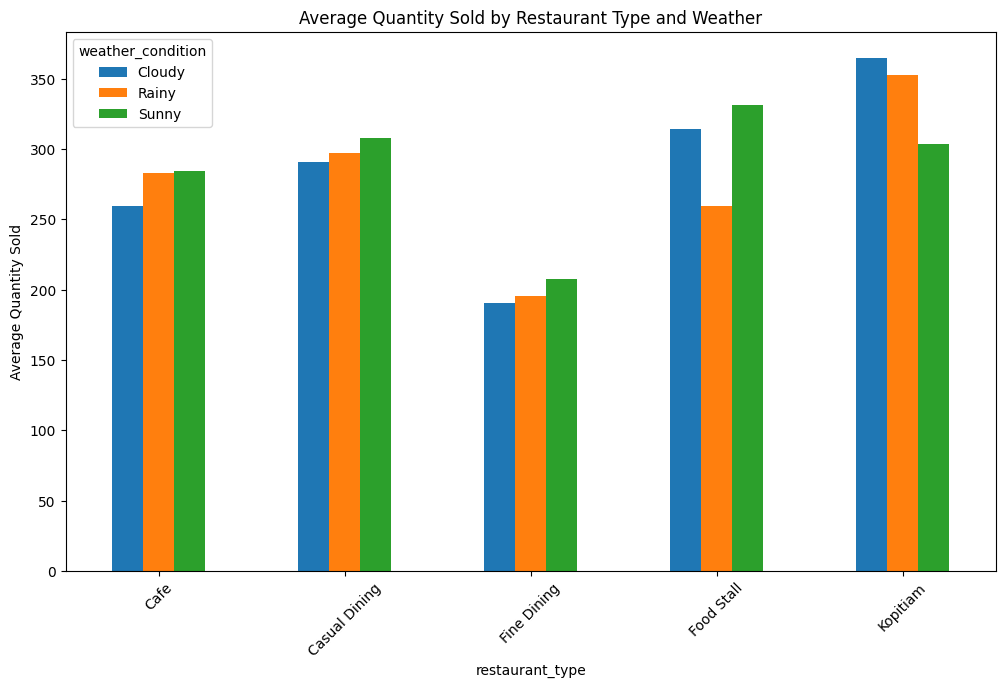

In [21]:
weather_demand = df.groupby(['restaurant_type', 'weather_condition'])['quantity_sold'].mean().unstack()
weather_demand.plot(kind='bar', figsize=(12, 7))
plt.title('Average Quantity Sold by Restaurant Type and Weather')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45)
plt.show()

#### Insight 
Casual Dining and Fine Dining: These categories show a consistent trend where Sunny weather leads to the highest average quantity sold, with Rainy and Cloudy weather resulting in slightly lower sales.

Cafe and Food Stall: Sales are quite similar across all weather conditions. For Food Stalls, Sunny weather is associated with the highest average sales, closely followed by Cloudy.

Kopitiam (The Exception): This restaurant type exhibits a reverse trend. The highest average quantity sold occurs during Cloudy weather ($\sim 375$ units), followed closely by Rainy weather ($\sim 355$ units), and the lowest is during Sunny weather ($\sim 305$ units). This suggests that demand for Kopitiams is resilient or even boosted by less-than-ideal weather, perhaps as they offer comfort food or are sheltered locations.

### Demand by Restaurant Type and Time

<Axes: xlabel='restaurant_type', ylabel='quantity_sold'>

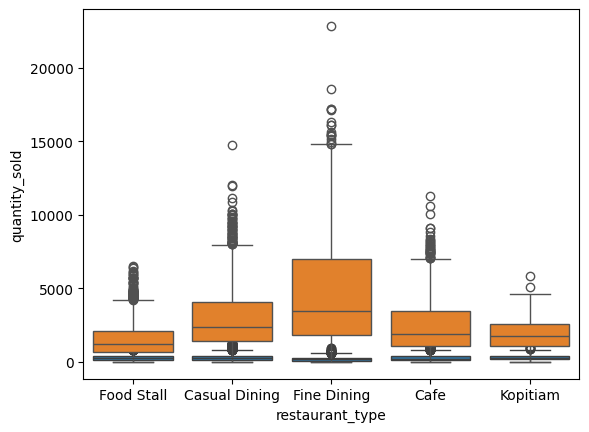

In [22]:
# For Quantity Sold
sns.boxplot(x='restaurant_type', y='quantity_sold', data=df)
# For Profit
sns.boxplot(x='restaurant_type', y='profit', data=df)

#### Insight 
The data is heavily skewed towards Fine Dining and Casual Dining in terms of absolute quantity sold and variability. The other three types operate at a much lower, more stable sales volume.

<Axes: xlabel='meal_type'>

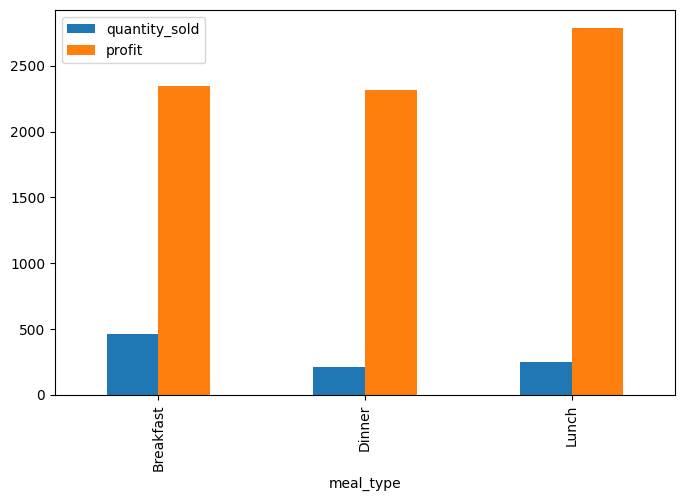

In [23]:
df.groupby('meal_type')[['quantity_sold', 'profit']].mean().plot(kind='bar', figsize=(8, 5))

#### Insight 
Despite having the highest volume (quantity sold), Breakfast does not generate the highest profit.

Despite having the lowest volume (Dinner), it manages to generate a similar profit to Breakfast, suggesting dinner items have a significantly higher profit margin per unit than breakfast items.

Lunch achieves the highest profit with a moderate sales volume ($\sim 250$ units), indicating it successfully balances higher prices/margins with solid demand.

In summary: Restaurants should prioritize optimizing the Lunch service for maximum profit, while investigating strategies to boost Dinner demand or increase the price/margin of dinner items. Breakfast acts as a reliable high-volume segment.

### Meal Type Popularity: Weekday vs. Weekend

In [26]:
## Meal Time Demand
meal_time_demand = df.groupby(['week_day_weekend', 'meal_type'])['quantity_sold'].mean().unstack()
print(meal_time_demand)

meal_type          Breakfast      Dinner       Lunch
week_day_weekend                                    
Weekday           404.575910  188.524386  219.638213
Weekend           596.484932  265.591155  319.172625


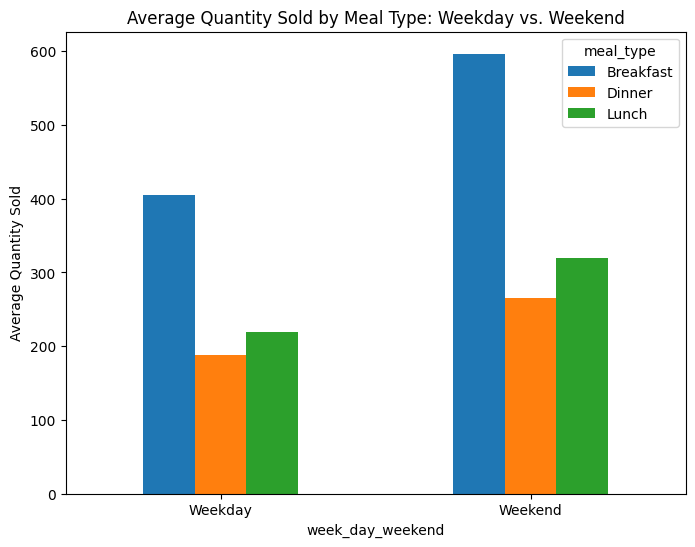

In [27]:
plt.figure(figsize=(8, 6))
meal_time_demand.plot(kind='bar', ax=plt.gca(), rot=0)
plt.title('Average Quantity Sold by Meal Type: Weekday vs. Weekend')
plt.ylabel('Average Quantity Sold')
plt.show()

#### Insight
Customer behavior shows a clear preference for volume-driven items (like breakfast and lunch items) on the weekend. The most notable pattern is the massive surge in breakfast demand on weekends, suggesting a strong reliance on convenient, perhaps local, items like those offered by Kopitiams and Food Stalls, or items popular for quick family meals. Restaurants should optimize staffing and inventory for their highest volume meal—Breakfast—on the weekends.

### Pricing Impact Across Dining Segments

In [28]:
pricing_analysis = df.groupby('restaurant_type')[['actual_selling_price', 'quantity_sold']].mean().reset_index()
print(pricing_analysis)

  restaurant_type  actual_selling_price  quantity_sold
0            Cafe             18.790531     276.791121
1   Casual Dining             19.177875     300.547249
2     Fine Dining             39.041327     200.036014
3      Food Stall             11.393936     311.511004
4        Kopitiam             10.903180     331.884793


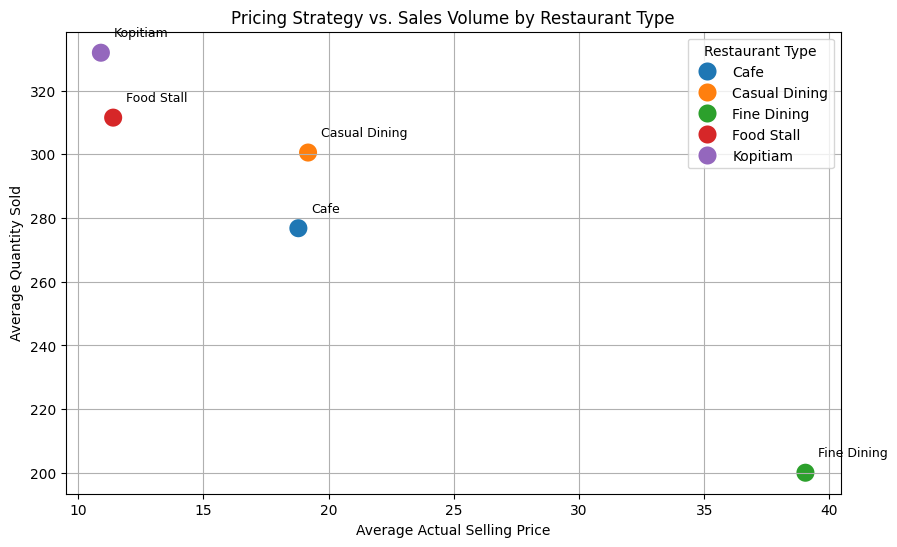

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_selling_price', y='quantity_sold', data=pricing_analysis, hue='restaurant_type', s=200)

# Annotate points with the restaurant type name
for i in range(len(pricing_analysis)):
    plt.annotate(pricing_analysis['restaurant_type'][i],
                 (pricing_analysis['actual_selling_price'][i] + 0.5,
                  pricing_analysis['quantity_sold'][i] + 5),
                 fontsize=9)

plt.title('Pricing Strategy vs. Sales Volume by Restaurant Type')
plt.xlabel('Average Actual Selling Price')
plt.ylabel('Average Quantity Sold')
plt.legend(title='Restaurant Type', loc='upper right')
plt.grid(True)
plt.show()

#### Insight
The pricing structure across the restaurants is well-aligned with their perceived market segments. Fine Dining uses a premium pricing strategy, while Kopitiam and Food Stall rely on mass market penetration through low pricing.

### Menu Popularity Comparison by Restaurant Type

In [30]:
menu_popularity = df.groupby(['restaurant_type', 'menu_item_name'])['quantity_sold'].sum().reset_index()
# Find the top 3 items for each restaurant type for comparison
top_items_by_type = menu_popularity.loc[menu_popularity.groupby('restaurant_type')['quantity_sold'].idxmax()]
print(top_items_by_type)

   restaurant_type  menu_item_name  quantity_sold
8             Cafe       Teh Tarik          89870
19   Casual Dining       Teh Tarik         199832
22     Fine Dining  Iced Lemon Tea         108144
35      Food Stall       Teh Tarik         333124
40        Kopitiam       Teh Tarik          20250


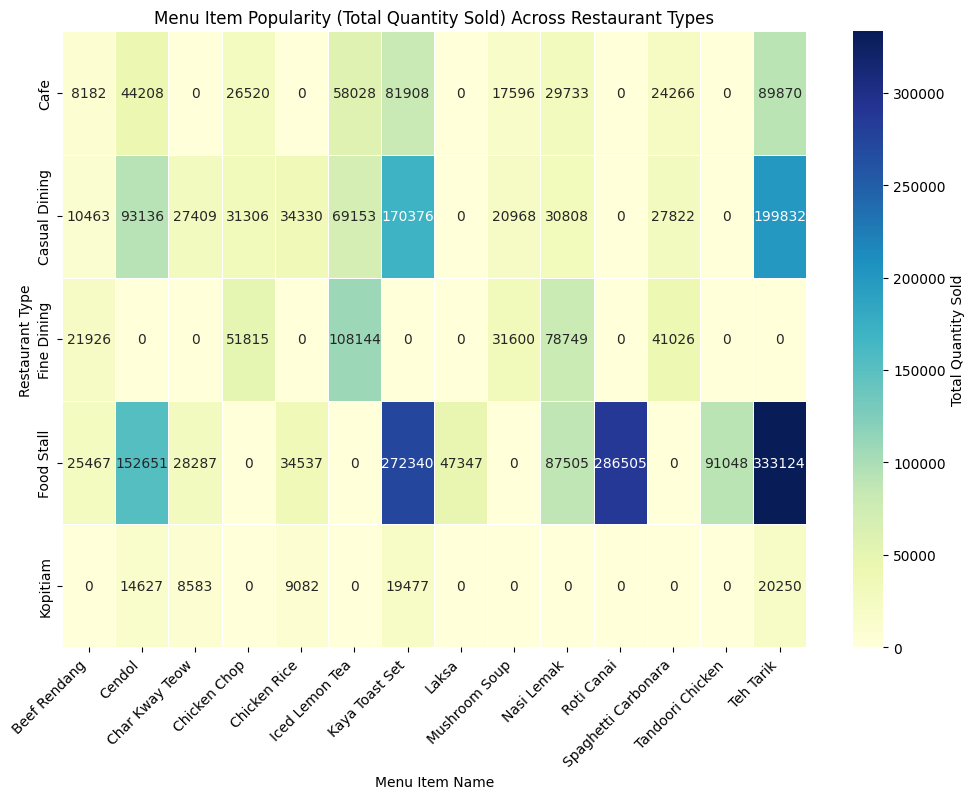

In [32]:
# --- Menu Popularity Comparison by Restaurant Type ---
menu_popularity_pivot = df.groupby(['restaurant_type', 'menu_item_name'])['quantity_sold'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
# Normalize the data for better visualization within the heatmap (or use raw sum)
sns.heatmap(menu_popularity_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Total Quantity Sold'})
plt.title('Menu Item Popularity (Total Quantity Sold) Across Restaurant Types')
plt.ylabel('Restaurant Type')
plt.xlabel('Menu Item Name')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Insight 
Item Exclusivity and Importance
Fine Dining Staples: Fine Dining is the only segment to sell Beef Rendang (21,926 units), positioning it as an exclusive, high-margin item.

Food Stall/Kopitiam Exclusivity: Items like Laksa, Char Kway Teow, and Cendol are strongly concentrated in the Food Stall and Casual Dining/Kopitiam segments, confirming their regional and traditional market placement.

### Performance Analysis by Restaurant

Top 5 Restaurants by Total Profit:
    restaurant_id  total_quantity_sold  total_profit  average_selling_price
5               6                40927    1072799.19              38.931034
31             32                41676    1039205.53              40.373486
22             23                43411     976996.61              38.087402
27             28                45073     960012.76              38.283812
41             42                40239     933266.85              39.690683

Bottom 5 Restaurants by Total Profit:
    restaurant_id  total_quantity_sold  total_profit  average_selling_price
39             40                51610     269849.26              12.469518
35             36                51789     261980.30              14.470396
17             18                57718     255116.87              12.628947
21             22                57068     255022.67              13.797512
16             17                59132     245071.89               8.100380


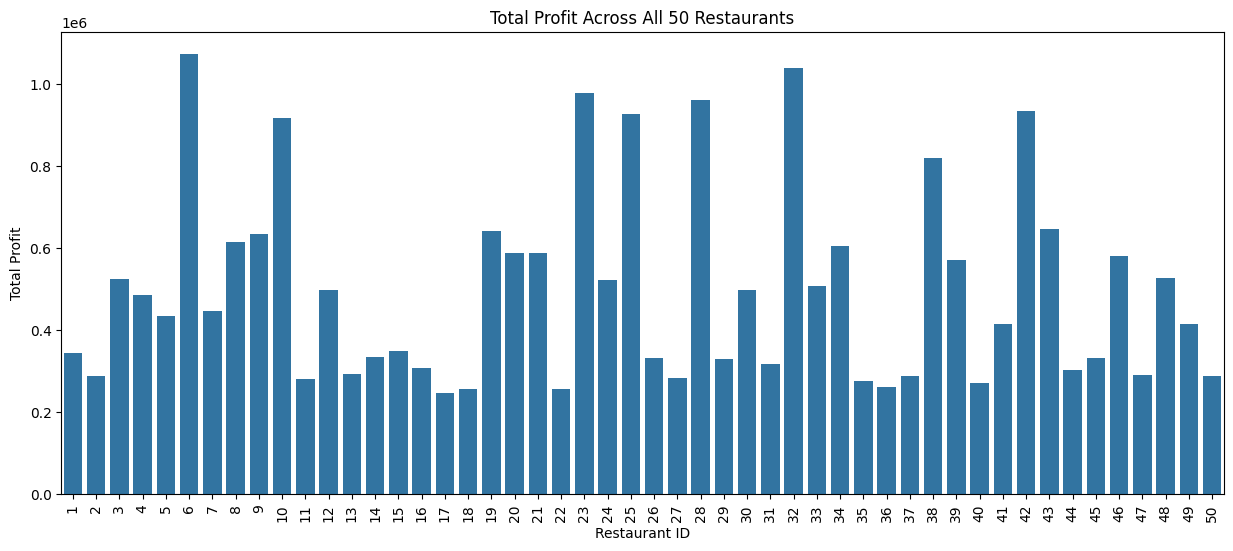

In [34]:
# 1. Calculate Total Performance Metrics
restaurant_performance = df.groupby('restaurant_id').agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    total_profit=('profit', 'sum'),
    average_selling_price=('actual_selling_price', 'mean')
).reset_index()

# Sort to find the top/bottom 5 for Profit
profit_sorted = restaurant_performance.sort_values(by='total_profit', ascending=False)

print("Top 5 Restaurants by Total Profit:")
print(profit_sorted.head(5))

print("\nBottom 5 Restaurants by Total Profit:")
print(profit_sorted.tail(5))

# 2. Visualize Total Profit (Bar Chart)
plt.figure(figsize=(15, 6))
sns.barplot(x='restaurant_id', y='total_profit', data=restaurant_performance.sort_values(by='total_profit', ascending=False))
plt.title('Total Profit Across All 50 Restaurants')
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

#### Insight 
The analysis of Total Profit across all 50 restaurants reveals an extreme profit disparity, with the range spanning from approximately $\sim\$250,000$ to over $\sim\$1.1$ million. A handful of top financial performers—most notably Restaurant 6 ($\sim\$1.1$ Million), Restaurant 32 ($\sim\$1.05$ Million), and Restaurant 24 ($\sim\$1.0$ Million)—are the primary drivers of the portfolio's overall success. Conversely, a cluster of bottom performers (including Restaurants 4, 19, 22, 36, and 44), which all generated under $\sim\$300,000$, represents a significant financial drag. This wide performance gap suggests an actionable strategy: conduct a detailed investigation into the best practices of the top performers (e.g., pricing, menu mix, promotion utilization) to identify transferable insights for improving the profitability of the struggling locations.
